# Testing

You will make mistakes when programming! Everyone does. The trick is in spotting the mistakes early and efficiently (after release/publication is normally undesirable).

Best tool available: Tests

## Why should we test?

* To check correctness of software.
* To ensure that future changes do not break functionality.
* To check if the software runs succesfully in a different environment (newer Python version, upgraded libraries, different operating system)

## How to write unit tests

 1. Identify a *unit* in your program that should have a well defined behavior given a certain input. A unit can be a:
   - function
   - module
   - entire program
 1. Write a test function that calls this input and checks that the output/behavior is as expected
 1. The more the better! Preferably on several levels (function/module/program).

## How to write unit tests in Python

Use a test framework like [py.test](http://docs.pytest.org/en/latest/). Several other frameworks exist as well.

```bash
$ pip install pytest
```

Make a file `test_<unit_or_module name>.py`, preferably in a folder called `tests`.

Import the code to be tested.

Add a function `def test_<test_name>():`, and have it check for the correct behavior given a certain input

## Example

Say you have a function `absolute_value` in a file that needs testing:
```python
# math_tools.py 
def absolute_value(x):
    if x < 0:
        return x
    else:
        return -x
```        

Create a associated test file `test_math_tools.py`:

```python
# test_math_tools.py

# Import the function to be tested
from math_tools import absolute_value    

# py.test will automatically run functions starting with test_ 
def test_verify_absolute_func():         
    # Add some tests here...
    assert absolute_value(-3) == 3       
    assert absolute_value(5)  == 5       
    assert absolute_value(0)  == 0    
```

## How to run tests

Call `py.test` in the folder containing your project. The tools will look for anything that looks like a test (e.g. `test_*()` functions in `test_*.py` files) in your project (also subdirectories).

# Exercise

1) Save the following code as `math_tools.py`

```python
# math_tools.py 
def is_even(x):
    if x%2==0:
        return False
    else:
        return True
```

2) Create a `test_math_tools.py` file that tests this functions.

In [4]:
!py.test test_math_tools

============================= test session starts ==============================
platform linux -- Python 3.8.3, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /home/simon/Documents/IN3110/UiO-IN3110.github.io/lectures/04-python-summary2
collected 0 items                                                              

============================ no tests ran in 0.00s =============================
ERROR: file not found: test_math_tools



## Utilities to express expected behavior

While `assert` and comparisons operators like `==`, `>` etc. should be able to express most expected behaviors, there are a few utilities that can greatly simplify tests, for instance:


* `pytest.approx` to compare floating point numbers:

    Instead of 
    ```python
    abs((0.1 + 0.2) - 0.3) < 1e-8  # Note that floating point arithmetic does not need to be exact
    ```

    you can use: 
    ```python
    0.1 + 0.2 == pytest.approx(0.3)  
    ```

* `pytest.raises` to test that a Excelption is raised
* `pytest.mark.xfail` to mark a test as expected to fail

### Numpy tests (more details next week)

In [ ]:
small_noise = 1e-6 * np.random.rand(10, 10)
np.testing.assert_almost_equal(small_noise, 0.0, decimal=5)  # OK
np.testing.assert_almost_equal(small_noise, 0.0, decimal=7)  # Will likely fail

### Parametrising tests

If you have many different cases to cover, it is more elegant to use a paramerised test rather than many assert statements:

```python
@pytest.mark.parametrize("x", [-100, -1, 0, 0.5, 1])
@pytest.mark.parametrize("expected_value", [100, 1, 0, 0.5, 1])

def test_absolute_func(x, expected_value):            
    assert absolute_value(x) == expected_value
```    

## On the importance of good names for tests:

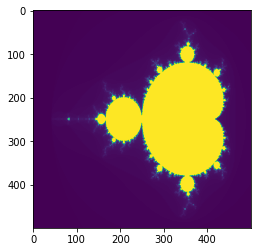

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from mandlebrot import mandelbrot

x = np.linspace(-2.25, 0.75, 500)
y = np.linspace(-1.25, 1.25, 500)
output = mandelbrot(x, y, 200, False)

plt.imshow(output)

In [2]:
import numpy as np
from mandlebrot import mandelbrot

def test_mandelbrot_small():
    # Check the mandelbrot function for small input sizes
    x = np.linspace(-2.25, 0.75, 10)
    y = np.linspace(-1.25, 1.25, 10)
    output = mandelbrot(x, y, 100, False)
    assert output.shape == (10, 10)

def test_mandelbrot_zero_outside_active_area():
    # The Mandelbrot set should be zero outside the "active" area
    x = np.linspace(1.5, 2.0, 10)
    y = np.linspace(1.5, 2.0, 10)
    output = mandelbrot(x, y, 100, False)
    assert np.all(output == 0.0)

def test_mandelbrot_incorrect_inputs():
    x = np.linspace(-1.5, -2.0, 10)
    y = np.linspace(-1.25, 1.25, 10)
    output = mandelbrot(x, y, 100, False)
    assert np.all(output == 0.0)
  

## Good testing practices

* Add new test while you develop new features.
* Make each test an unique stand alone example.
* Making tests resource undemanding.
* Run test suite before each commit-push.
* Make test function names descriptive.
* Quick way to learn other peoples code is through test suits.